### <center> Real data example: Recôncavo Basin, Bahia, Brasil

In [3]:
#----------------------------- ALL INTERNAL PACKAGES --------------------------- #
import numpy as np
import ipywidgets as widgets
import scipy as sp
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import Latex
#from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import axes3d
#import pyproj
import utm

In [11]:
#leitura dos dados do modelo selecionado

modelo= pd.read_csv('Dados finais/model_intrusion1.txt', sep=' ', header=None, comment='#' )

#descobrir numero de pontos do modelo

print (modelo)


                 0            1
0    588892.993886   376.691371
1    588406.417058   529.679744
2    587838.744093   640.171347
3    587271.071127   784.660366
4    586946.686576   903.651322
5    586865.590438  1133.133882
6    587189.974989  1286.122255
7    586865.590438  1481.607398
8    586946.686576  1668.593187
9    586541.205886  1770.585436
10   585811.340645  1821.581560
11   585324.763817  1906.575100
12   584757.090852  2017.066703
13   584270.514024  2127.558306
14   583946.129473  2221.051200
15   583783.937197  2314.544095
16   583378.456507  2391.038281
17   582891.879680  2493.030530
18   582891.879680  2569.524716
19   582729.687404  2671.516965
20   582729.687404  2773.509213
21   582567.495128  2900.999524
22   582567.495128  3011.491127
23   582486.398990  3087.985313
24   582324.206714  3240.973686
25   582324.206714  3342.965935
26   582243.110577  3410.960767
27   582080.918301  3529.951724
28   581918.726025  3623.444618
29   581756.533749  3793.431699
..      

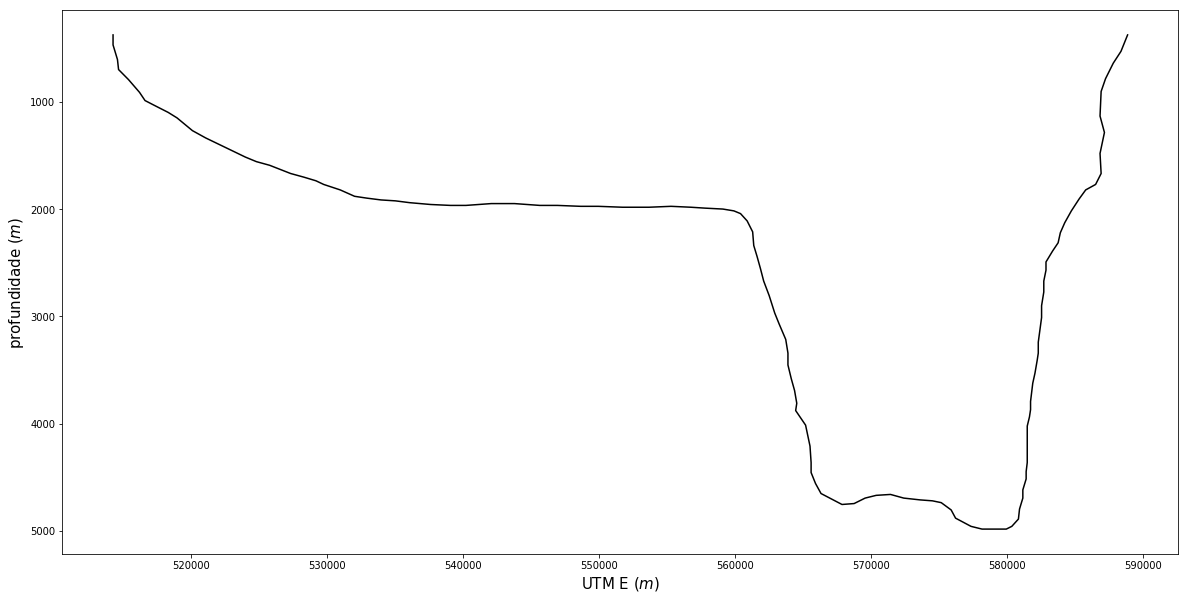

In [13]:

#plot do modelo selecionado
plt.close('all')
fig = plt.figure(figsize=(20,10), facecolor='w')

plt.xlabel('UTM E ($m$)', fontsize = 15)
plt.ylabel('profundidade ($m$)', fontsize = 15)
plt.plot(modelo[0], modelo[1], 'k-')
plt.gca().invert_yaxis()

#plt.savefig('figs finais/model_intrusion1.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()

In [22]:
#leitura dos dados do ajuste

ajuste= pd.read_csv('Dados finais/datafit_intrusion11.txt', sep=' ', header=None, comment='#' )



ajuste

,0,1,2
0,514122.354726,-0.986523,1.395778
1,514204.447143,-1.094727,1.090224
2,514286.539476,-1.223374,1.344699
3,514368.631725,-1.371886,2.060618
4,514450.723888,-1.535639,2.205450
5,514532.815968,-1.697859,2.135103
6,514614.907962,-1.850223,2.064756
7,514696.999872,-1.989777,1.994408
8,514779.091698,-2.116476,1.712628
9,514861.183439,-2.232010,1.051418


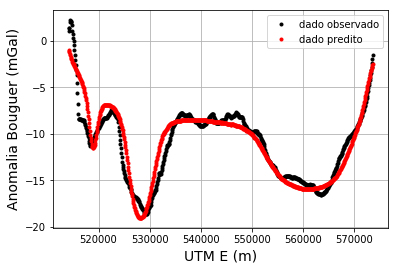

In [24]:
plt.plot(ajuste[0], ajuste[2],'.k', label='dado observado')
plt.plot(ajuste[0],ajuste[1],'.r', label='dado predito')
plt.legend()
plt.grid()
plt.xlabel('UTM E (m)', fontsize = 14)
plt.ylabel('Anomalia Bouguer (mGal)', fontsize = 14)
plt.savefig('Dados finais/datafit_intrusion11.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()